[View in Colaboratory](https://colab.research.google.com/github/tchappui/heia-course-chemical-process-intensification/blob/master/Part1/S04_Exercise7.ipynb)

# S04 Exercise 7

## Importation of the needed libraries

In [0]:
# vectors and linear algebra
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

# solvers to integrate ordinary differential equations
import scipy.integrate as solvers

## Definition of the constants

In [0]:
P0 = 10 # atm
CA0 = 0.2 # mol/L
FA0 = 2 # mol/min
alpha = 0.02 # 1/kg
epsilon = -2/3 # - 
k = 6 # L2/mol2*kg*min

## Definition of the balance equations

In [0]:
def balances(variables, W, k, CA0, FA0, epsilon, alpha):
    X, y = variables
    
    # y = sqrt(1 - alpha * W)

    CA = CA0 * (1 - X) / (1 + epsilon * X) * y
    CB = CA0 * (2 - 2 * X) / (1 + epsilon * X) * y

    r = k * CA * CB**2
    RA = -r

    dX = -RA / FA0
    dy = -(alpha / 2 / y) * (1 + epsilon * X)

    return dX, dy

## Initial conditions and integration range

In [0]:
initial_conditions = [0, 1] # [X0 y0]

In [0]:
W = np.arange(0, 100, 0.1) # kg-cat

In [0]:
results = solvers.odeint(
    balances, 
    initial_conditions, 
    W, 
    (k, CA0, FA0, epsilon, alpha)
)

In [0]:
X = results[:,0]
P = results[:,1] * P0

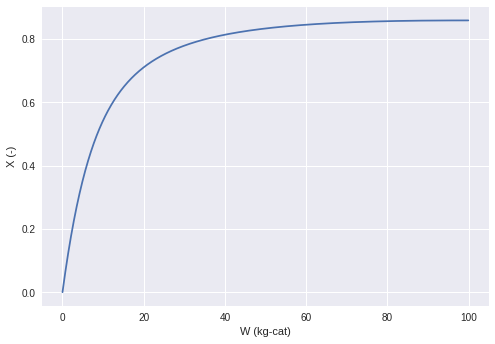

In [12]:
plt.plot(W, X)
plt.xlabel('W (kg-cat)')
plt.ylabel('X (-)')
plt.show()

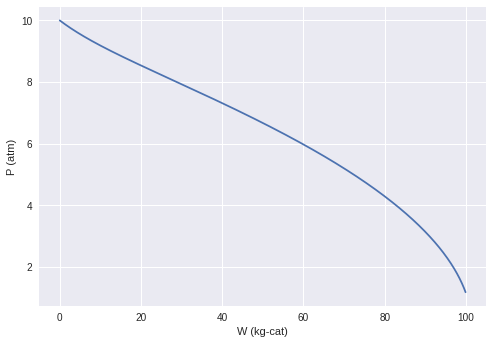

In [13]:
plt.plot(W, P)
plt.xlabel('W (kg-cat)')
plt.ylabel('P (atm)')
plt.show()